#1. Introduction




> Did you know that 80% of heart attacks can be avoided? Indeed, they are. We tried to visualize a few important risk factors for heart attacks in this notebook. Here, a variety of age groups, genders, behaviors, and health-related concerns are represented in the sample of data. The majority of the visuals are self-explanatory and aim to communicate the majority of the information using straightforward but effective visualization techniques.



> Problem statement:
>*   What are the main factors that contribute to stroke occurrence in the dataset?
*   Can we effectively identify individuals at risk of experiencing cerebral strokes based on their attributes?
*   How well does the model perform in detecting stroke occurrence while considering the class imbalance?
*   How can healthcare providers use the model's predictions to improve patient care and reduce the risk of strokes?






#2. Libraries And Utilities


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Importing Dataset

In [3]:
from google.colab import files

uploaded = files.upload()

Saving dataset.csv to dataset.csv


#4.  Data Preprocessing

>In this section, loading of data, dealing with missing values and feature extraction will be carried out. In the current dataset, there are 11 features and one binary target. A brief information about the features are given below
*  **id**: Identification number of the individual.
*  **gender**: Gender of the individual.
*  **hypertension**: Health related parameter, does person have hypertension.
*  **heart_disease**: Health related parameter, does person have heart disease.
*  **ever_married**: Personal information, is person married on not?
*  **work_type**: Nature of work place.
*  **Residence_type**: Residence type of the individual.
*  **avg_glucose_level**: average glucose level in blood for the individual.
*  **bmi**: body mass index of the individual.
*  **smoking_status**: Habitual information. Current smoking status of individual.
*  **stroke**: Our taget, is person suffered heart attack?

In [4]:
df=pd.read_csv("dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
df.shape

(43400, 12)

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# 5. Checking Null values

In [ ]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

#6. Initial Insights

>* There are 43,400 rows and 12 columns
*  There are missing data in bmi and smoking status features.
*  **Categorical features** : gender, ever_married, work_type, Residence_type, smoking_status
*  **Binary Numerical Features**: hypertension,heart_disease, stroke
*  **Continous Numerical Features**: age, avg_glucose_level, bmi

#7. Dealing with Missisng Values

In [8]:
dfn=df.copy()
dfn=dfn.dropna()

> Creating copy of dataset and then dropping null values to check how much % of data is lost.

In [9]:
df.shape

(43400, 12)

> Dataset before dropping of null values

In [10]:
dfn.shape

(29072, 12)

> Dataset after dropping of null values

In [11]:
len(df)

43400

In [12]:
loss=len(df)-len(dfn)
(loss/len(df))*100

33.013824884792626

> Deleting missing value can cause loss of more than 30% of data. Hence we instead use imputation method to replace the missing data with alternate values.

In [13]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df["smoking_status"]=imp.fit_transform(df["smoking_status"].values.reshape(-1,1))

> Since smoking status is categorical value we use mode or most frequent to replace the missing values.

In [14]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df["bmi"]=imp.fit_transform(df["bmi"].values.reshape(-1,1))

> Since bmi is continuous value we use mean to replace the missing values.

In [15]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

> No null values are present after performing imputation

# 8. Correlation

> Correlation tells us strength of relationship i.e. how each feature is strongly/weakly related to every other feature in the dataset.

<Axes: >

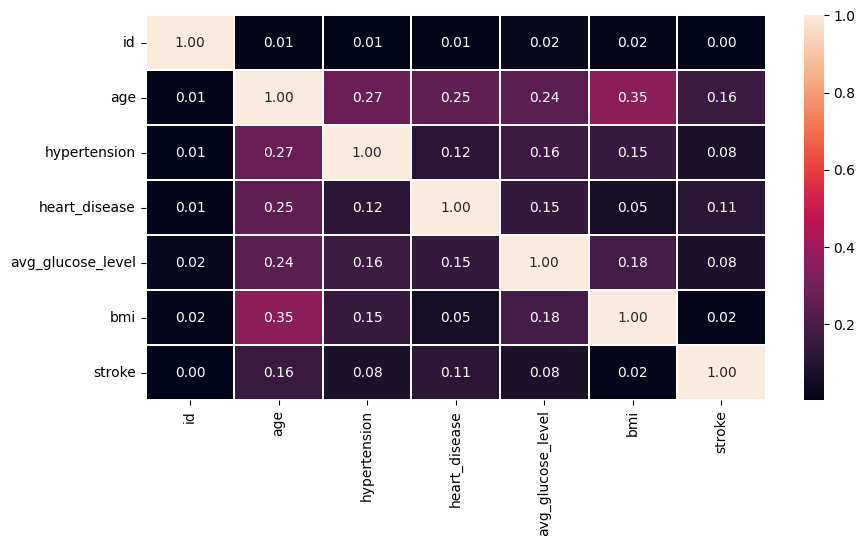

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='white',fmt="0.2f")

In [ ]:
sp=pd.DataFrame(df.iloc[:,1:].corr())
print("Percent correlation of following features with target column Stroke\n")
round(sp["stroke"]*100)


Percent correlation of following features with target column Stroke



age                   16.0
hypertension           8.0
heart_disease         11.0
avg_glucose_level      8.0
bmi                    2.0
stroke               100.0
Name: stroke, dtype: float64

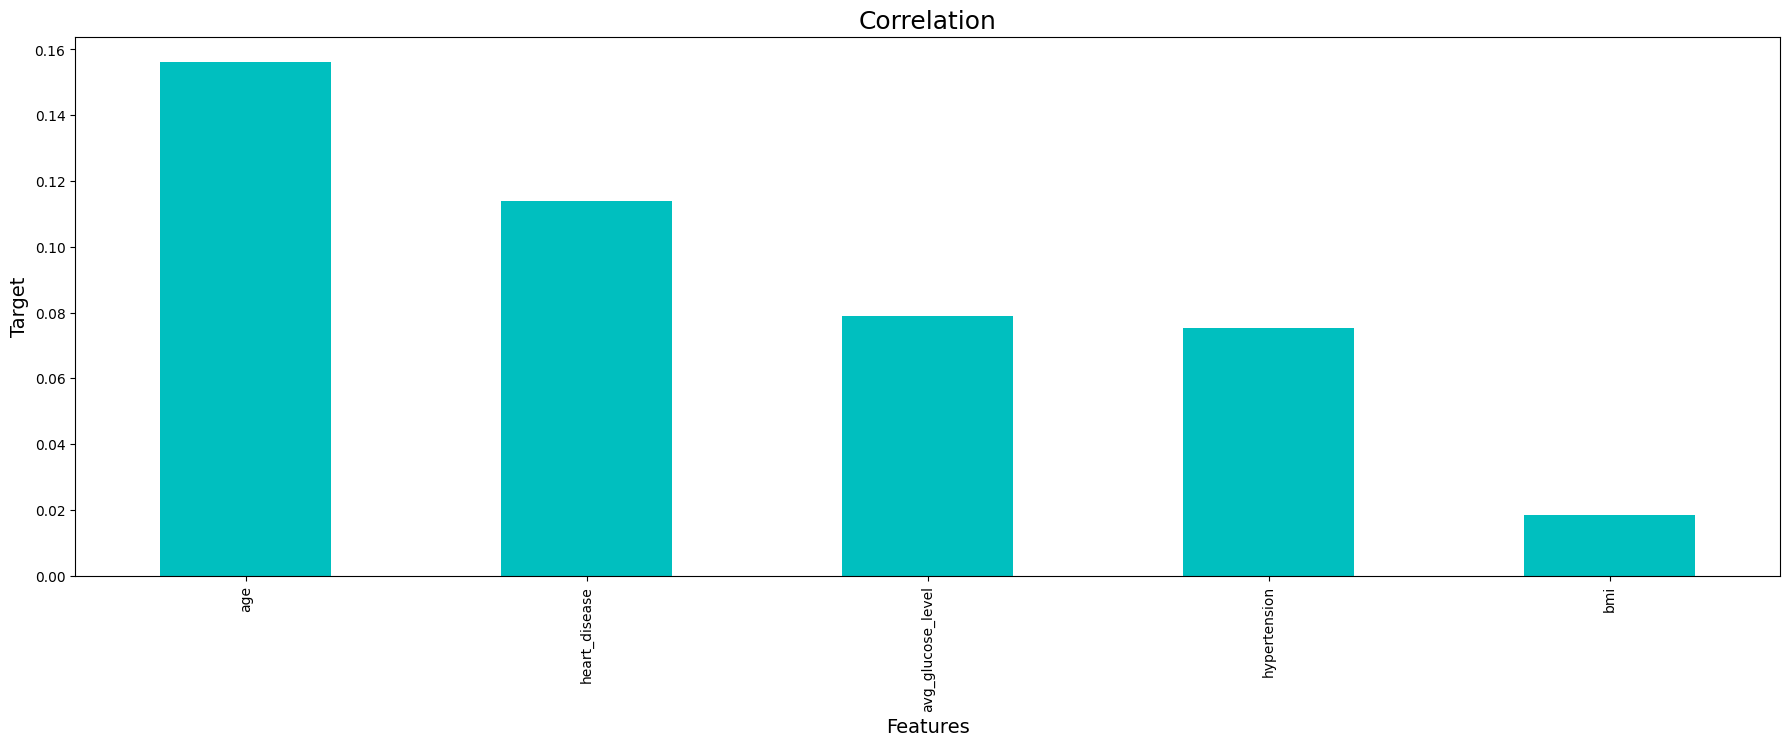

In [ ]:
plt.figure(figsize=(22,7))
df.iloc[:,1:].corr()["stroke"].sort_values(ascending=False).drop(["stroke"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

> Positive correlation with traget colum
- Max +ve correlation: Age
- Min +ve correlation: BMI

#9. Describing Data

> Helps to perform statiscal analysis on each feature of the dataset.

In [ ]:
round (df.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.00,43400.00,43400.00,43400.00,43400.00,43400.00,43400.00
mean,36326.14,42.22,0.09,0.05,104.48,28.61,0.02
std,21072.13,22.52,0.29,0.21,43.11,7.64,0.13
min,1.00,0.08,0.00,0.00,55.00,10.10,0.00
25%,18038.50,24.00,0.00,0.00,77.54,23.40,0.00
50%,36351.50,44.00,0.00,0.00,91.58,28.10,0.00
75%,54514.25,60.00,0.00,0.00,112.07,32.60,0.00
max,72943.00,82.00,1.00,1.00,291.05,97.60,1.00


> - Average age of patient is 44
- Average glucose level of patient is 91.58
- Average bmi of the patient is 28.10

In [ ]:
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,43400,43400,43400,43400,43400
unique,3,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,25665,27938,24834,21756,29345


In [17]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

> Creating new categorical feature

> bmi_cat
- 0 to 19 underweight
- 20 to 25 ideal
- 26 to 30 overweight
- 31 and above obesity

> age_cat
- 0 to 13 child
- 14 to 18 teen
- 19 to 45 adult
- 46 to 60 mid adult
- 61 and above elder

> glucose_cat
- 0 to 90 low
- 91 to 160 normal
- 161 to 230 High
- 231 and above Very high

# 10. Visualization

# a) Univariate Analysis

Number of patients that have ever_married
Yes    27938
No     15462
Name: ever_married, dtype: int64


Number of patients that have hypertension
0    39339
1     4061
Name: hypertension, dtype: int64


Number of patients that have heart_disease
0    41338
1     2062
Name: heart_disease, dtype: int64


Number of patients that have stroke
0    42617
1      783
Name: stroke, dtype: int64




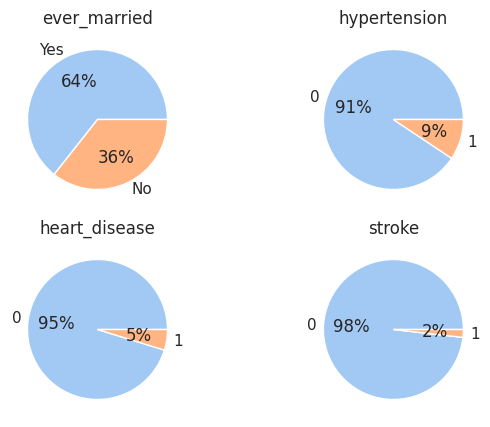

In [18]:
sns.set()
fig,axes=plt.subplots(2,2,figsize=(7,5))
k=0
j=0

list0=['ever_married','hypertension','heart_disease','stroke']
for i in list0:
  palette_color = sns.color_palette('pastel')
  n=pd.DataFrame(df[i].value_counts())
  month_sold=np.array(df[i].value_counts())
  axes[j,k].pie(month_sold,labels=n.index,colors=palette_color, autopct='%.0f%%')
  axes[j,k].set_title(i)
  print("Number of patients that have",i)
  print(df[i].value_counts())
  print("\n")
  k=k+1

  if k==2:
    k=0
    j=j+1

plt.show()

> - Every 2 in 100 people are prone to stroke
- Every 5 in 100 heart patient are susceptible to  stroke
- Every 9 in 100 people having hypertension can get stroke
- Married People are at higher risk of having stroke





In [20]:
list1=[]
for i in df.columns:
  if df[i].dtypes=='object':
    list1.append(i)

> Create list of all the categorical features

In [21]:
list1

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [22]:
list1.remove('ever_married')

> Drop feature since its already visualized in previous figure

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64


Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64


Urban    21756
Rural    21644
Name: Residence_type, dtype: int64


never smoked       29345
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64




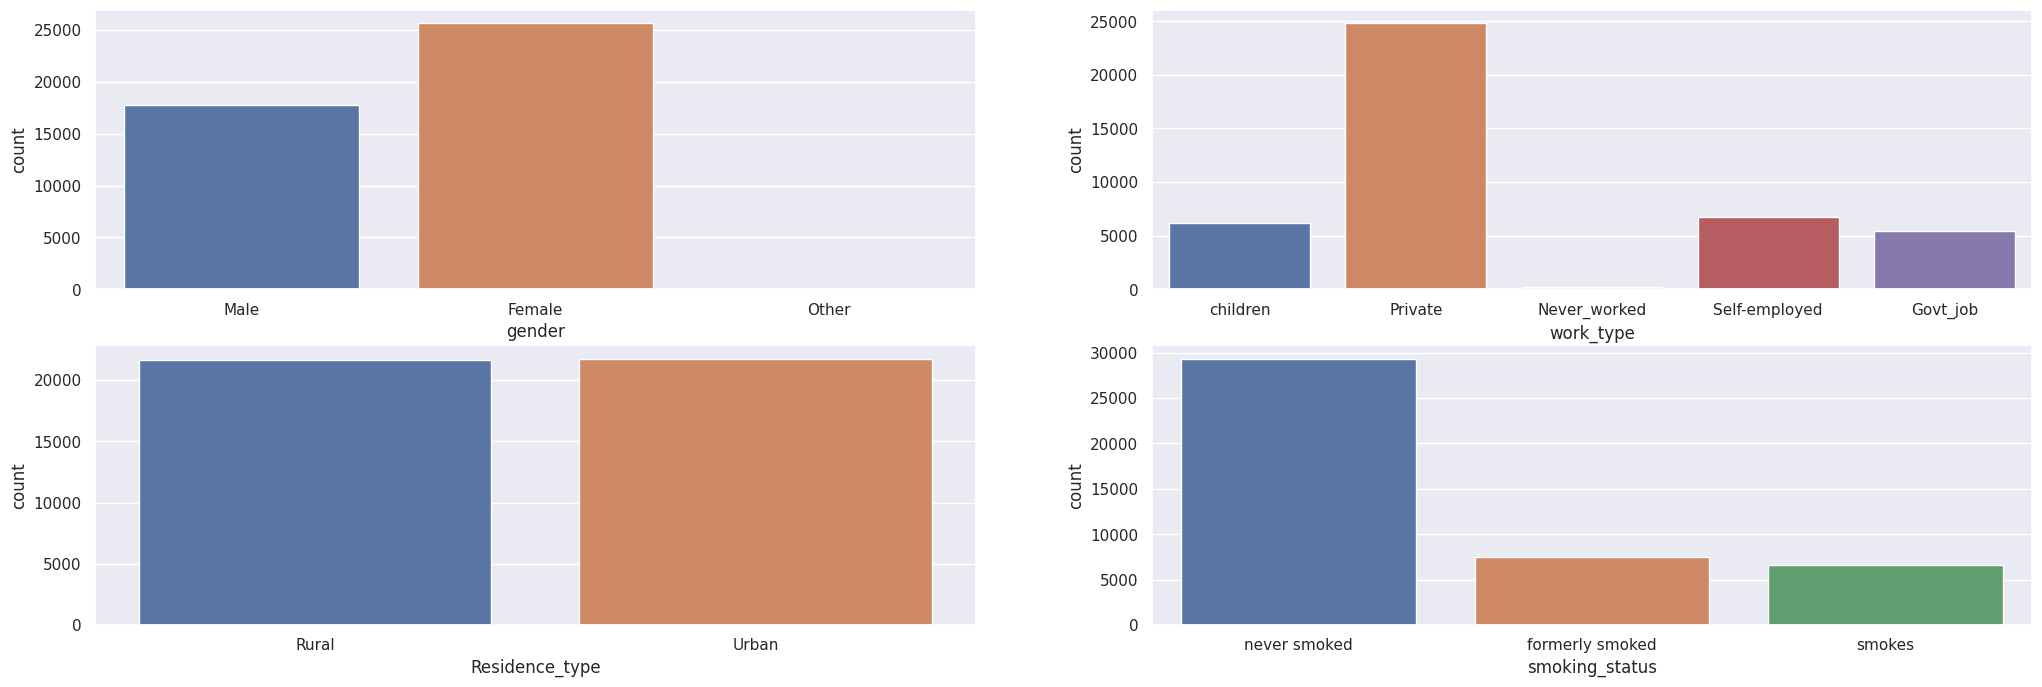

In [23]:
sns.set()
fig,axes=plt.subplots(2,2,figsize=(25,7))
plt.subplots_adjust(bottom=0.001)
k=0
j=0

for i in list1:
  sns.countplot(x=df[i],ax=axes[j,k])
  print(df[i].value_counts())
  print("\n")
  k=k+1


  if k==2:
    k=0
    j=j+1

> - Close to 25k of total 43k patients are female
- Majority of people work in Private sector
- Close to 28k of total 43k patients have never smoked

Adults        14812
Elderly       10511
Mid Adults    10038
Children       5745
Teens          2294
Name: age_cat, dtype: int64


Obesity        15782
Overweight     13171
Ideal          10618
Underweight     3829
Name: bmi_cat, dtype: int64


Low          20554
Normal       17711
High          4310
Very High      825
Name: glucose_cat, dtype: int64




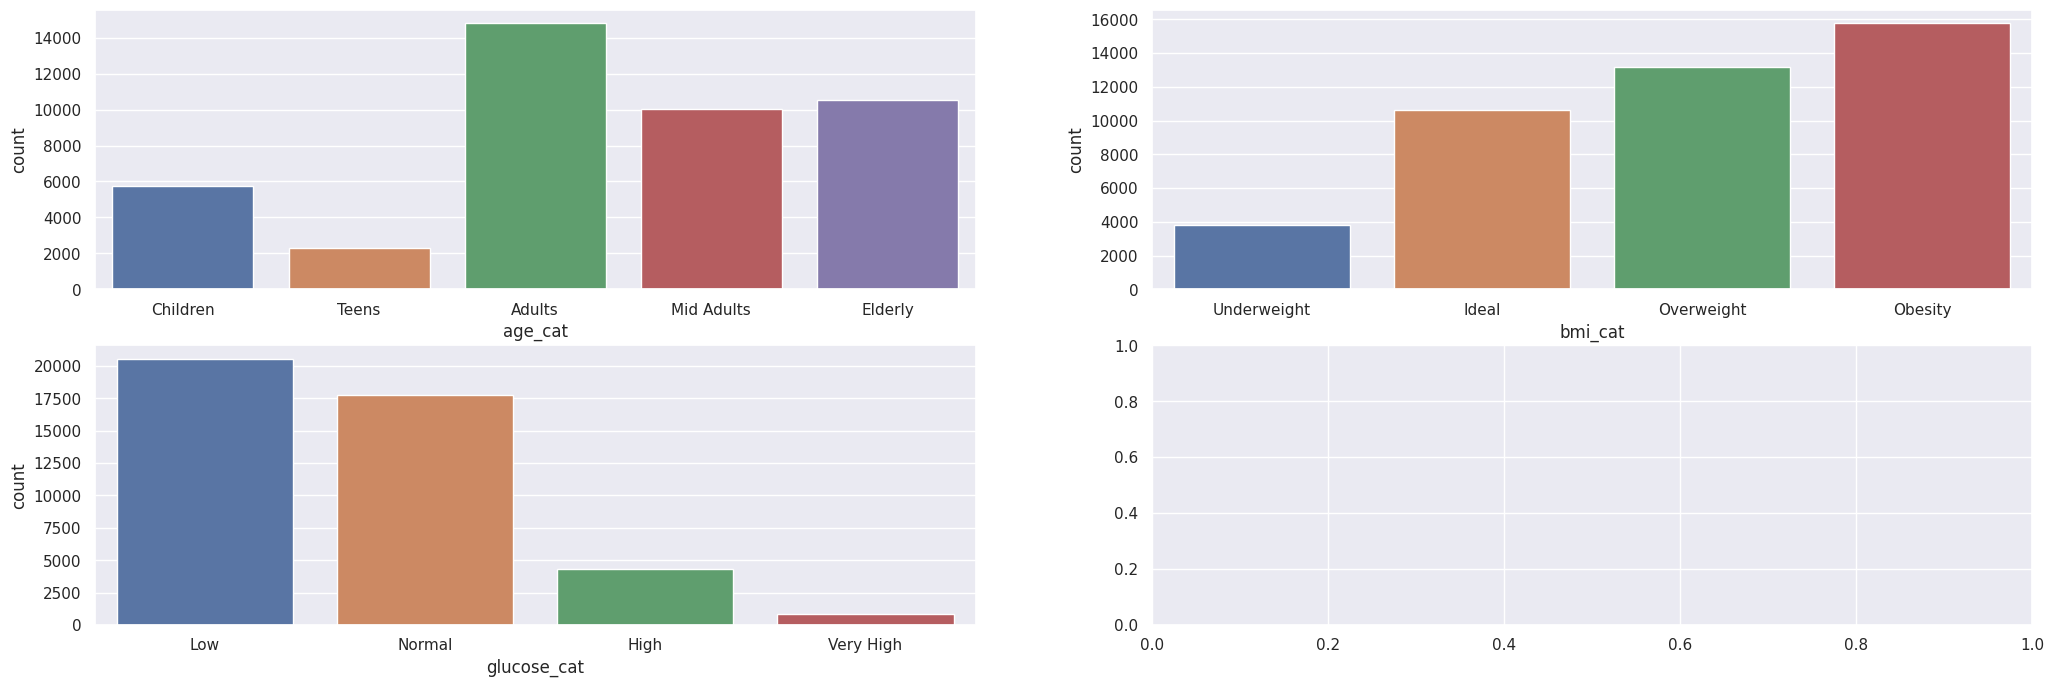

In [24]:
sns.set()
fig,axes=plt.subplots(2,2,figsize=(25,7))
plt.subplots_adjust(bottom=0.001)
k=0
j=0

for i in ['age_cat','bmi_cat','glucose_cat']:
  sns.countplot(x=df[i],ax=axes[j,k])
  print(df[i].value_counts())
  print("\n")
  k=k+1


  if k==2:
    k=0
    j=j+1

> - Majority of patients are adult between age of 18 and 45
- Obese people dominate the bmi category whereas
- Patient with low glucose problem dominate the glucose category

# b) Bivariate Analysis

In [ ]:
import matplotlib

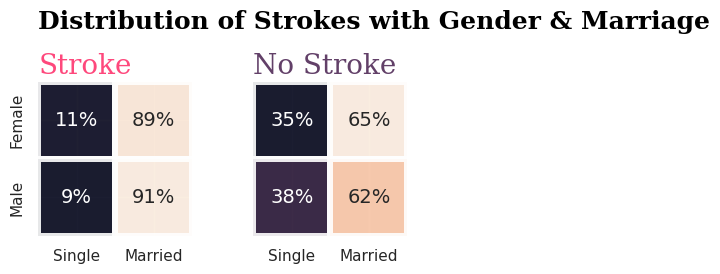

In [ ]:

fig = plt.figure(figsize=(5,2),dpi = 100)

gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


stroke = pd.crosstab(stroke['gender'],[stroke['ever_married']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['ever_married']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Marriage', {'font':'Serif', 'color':'black', 'weight':'bold','size':18})

ax0.text(0,-0.1,'Stroke', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['Single', 'Married'])
ax1.axes.set_xticklabels(['Single', 'Married'])

ax0.axes.set_yticklabels(['Female', 'Male'])

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

> **Married people especially male are more prone to stroke.**



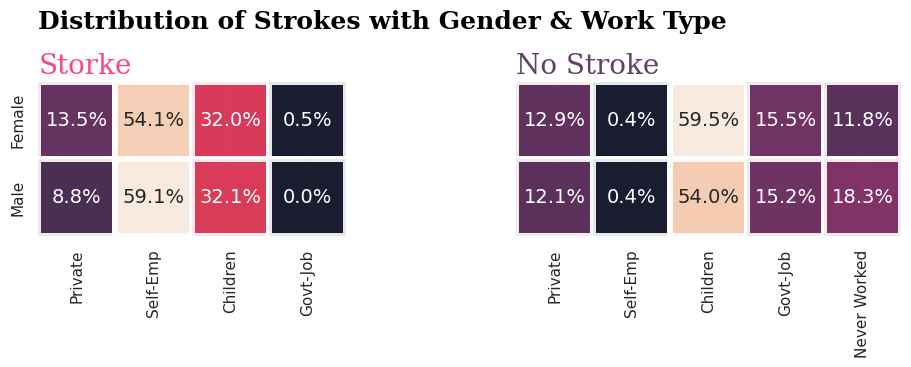

In [ ]:

fig = plt.figure(figsize=(12,2),dpi = 100)

gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


stroke = pd.crosstab(stroke['gender'],[stroke['work_type']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['work_type']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Work Type', {'font':'Serif', 'color':'black', 'weight':'bold','size':18})

ax0.text(0,-0.1,'Storke', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['Private', 'Self-Emp','Children','Govt-Job'])
ax1.axes.set_xticklabels(['Private', 'Self-Emp','Children','Govt-Job','Never Worked'])

gender_order = ['Female','Male']
work_order = ['Private', 'Self-Emp','Children','Govt-Job','Never Worked']

ax0.axes.set_yticklabels(gender_order)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

> **Self employed individuals have higher risk of getting stroke.**

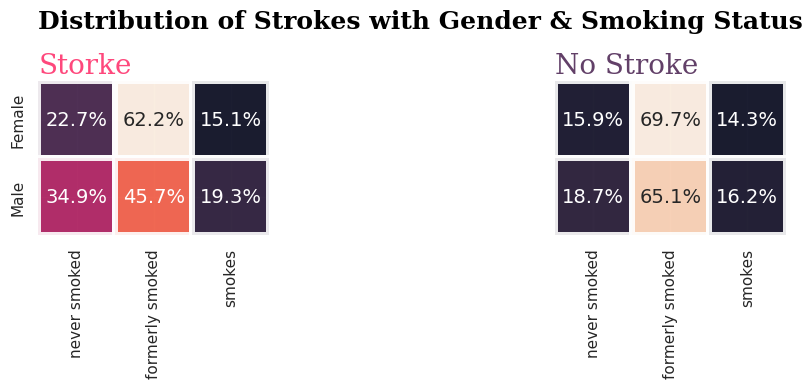

In [ ]:

fig = plt.figure(figsize=(12,2),dpi = 100)

gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


stroke = pd.crosstab(stroke['gender'],[stroke['smoking_status']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['smoking_status']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Smoking Status', {'font':'Serif', 'color':'black', 'weight':'bold','size':18})

ax0.text(0,-0.1,'Storke', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['never smoked', 'formerly smoked','smokes'])
ax1.axes.set_xticklabels(['never smoked', 'formerly smoked','smokes'])

gender_order = ['Female','Male']
smoking_order = ['never smoked', 'formerly smoked','smokes']

ax0.axes.set_yticklabels(gender_order)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

> **Patient with smoking habits are highly susceptible to stroke.**

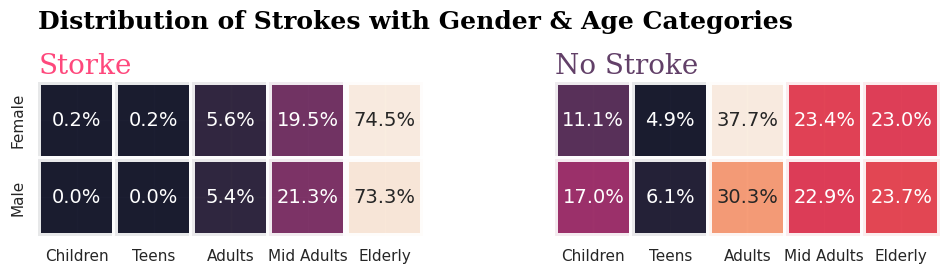

In [ ]:

fig = plt.figure(figsize=(12,2),dpi = 100)

gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


stroke = pd.crosstab(stroke['gender'],[stroke['age_cat']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['age_cat']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Age Categories', {'font':'Serif', 'color':'black', 'weight':'bold','size':18})

ax0.text(0,-0.1,'Storke', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

gender_order = ['Female','Male']
age_order = ['Children', 'Teens', 'Adults','Mid Adults', 'Elderly']

ax0.axes.set_xticklabels(age_order)
ax1.axes.set_xticklabels(age_order)

ax0.axes.set_yticklabels(gender_order)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

> **It has been observed that people in elderly category age group have higher chance of getting stroke.**

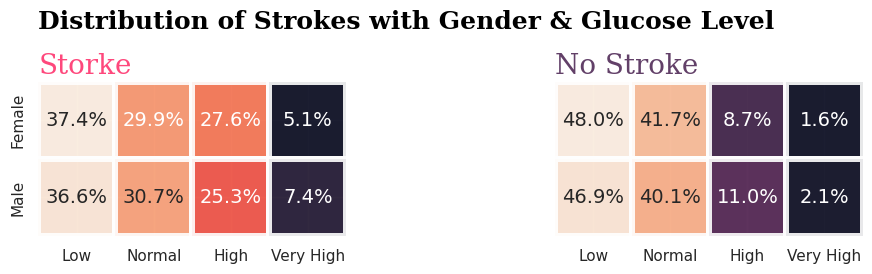

In [ ]:

fig = plt.figure(figsize=(12,2),dpi = 100)

gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


stroke = pd.crosstab(stroke['gender'],[stroke['glucose_cat']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['glucose_cat']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Glucose Level', {'font':'Serif', 'color':'black', 'weight':'bold','size':18})

ax0.text(0,-0.1,'Storke', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

gender_order = ['Female','Male']
glucose_order = ['Low', 'Normal', 'High', 'Very High']

ax0.axes.set_xticklabels(glucose_order)
ax1.axes.set_xticklabels(glucose_order)

ax0.axes.set_yticklabels(gender_order)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

> **It is observed that low glucose level also known as Hypoglycemia can trigger stroke.**

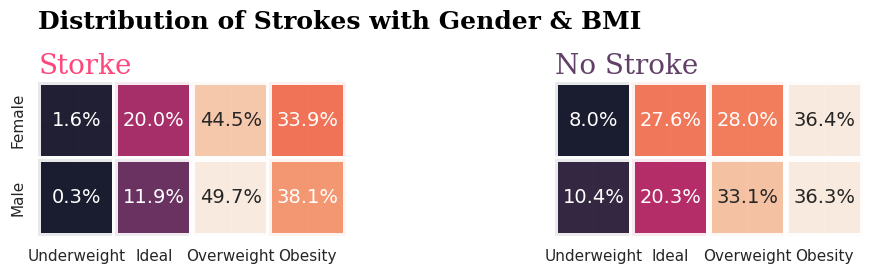

In [ ]:

fig = plt.figure(figsize=(12,2),dpi = 100)

gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


stroke = pd.crosstab(stroke['gender'],[stroke['bmi_cat']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['bmi_cat']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Gender & BMI', {'font':'Serif', 'color':'black', 'weight':'bold','size':18})

ax0.text(0,-0.1,'Storke', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

gender_order = ['Female','Male']
bmi_order = ['Underweight','Ideal','Overweight','Obesity']

ax0.axes.set_xticklabels(bmi_order)
ax1.axes.set_xticklabels(bmi_order)

ax0.axes.set_yticklabels(gender_order)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

> **Overweight and Obese people are at higher risk of getting stroke.**

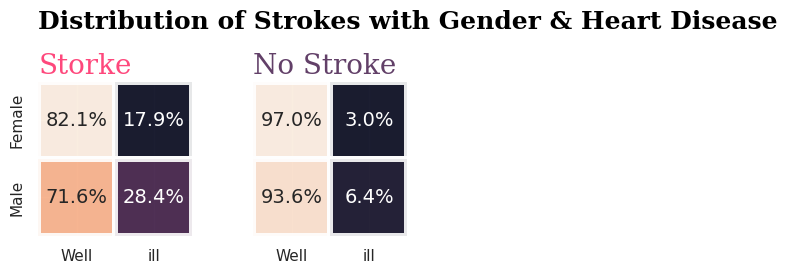

In [ ]:

fig = plt.figure(figsize=(5,2),dpi = 100)

gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


stroke = pd.crosstab(stroke['gender'],[stroke['heart_disease']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['heart_disease']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Heart Disease', {'font':'Serif', 'color':'black', 'weight':'bold','size':18})

ax0.text(0,-0.1,'Storke', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

gender_order = ['Female','Male']
hd_order = ['Well','ill']

ax0.axes.set_xticklabels(hd_order)
ax1.axes.set_xticklabels(hd_order)

ax0.axes.set_yticklabels(gender_order)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

> **It has been observed that even people without heart disease can have stroke.**

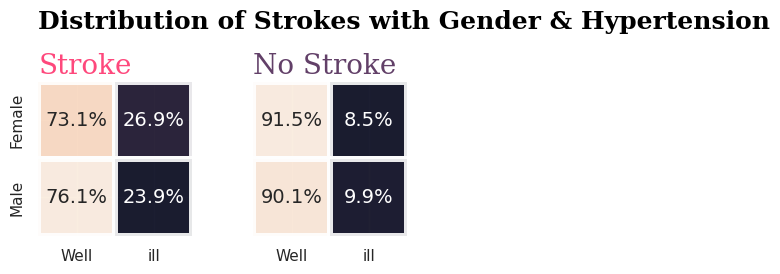

In [ ]:

fig = plt.figure(figsize=(5,2),dpi = 100)

gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


stroke = pd.crosstab(stroke['gender'],[stroke['hypertension']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['hypertension']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3,annot=True, fmt='1.1%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Hypertension', {'font':'Serif', 'color':'black', 'weight':'bold','size':18})

ax0.text(0,-0.1,'Stroke', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

gender_order = ['Female','Male']
ht_order = ['Well','ill']

ax0.axes.set_xticklabels(ht_order)
ax1.axes.set_xticklabels(ht_order)

ax0.axes.set_yticklabels(gender_order)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

> **It has been also noted that people without hypertension can also have stroke.**

# 11. Key Insight From Visualization

>People that are prone to stroke
*   Married especially male.
*   People that are self employed.
*   Smokers.
*  Elderly people.
* Overweight and Obese people





# 12. Checking Outliers

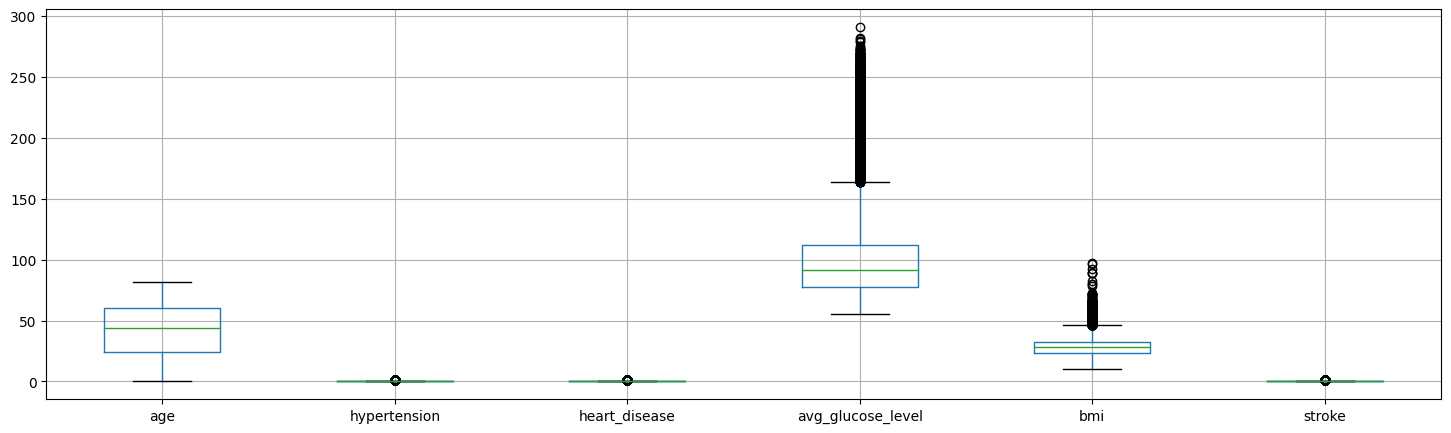

In [ ]:
import matplotlib.pyplot as plt
df.iloc[:,1:].boxplot(figsize=(18,5))
plt.subplots_adjust(bottom=0.1)
plt.show()

> It is observed that multiple feature contain presence of outliers which are basically extreme value that result in skewness of data thus affecting model accuracy.

In [ ]:
new_df_cap = df.copy()

> Create a copy of dataset and perform capping.

In [ ]:
def cap_outliers(n):
    Q1 = np.percentile(df[n], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df[n], 75, interpolation = 'midpoint')
    iqr = Q3 - Q1
    percentile25 = df[n].quantile(0.25)
    percentile75 = df[n].quantile(0.75)
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[df[n] > upper_limit]
    df[df[n] < lower_limit]

    new_df = df[df[n] < upper_limit]
    new_df.shape

    new_df_cap[n] = np.where(
    new_df_cap[n] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap[n] < lower_limit,
        lower_limit,
        new_df_cap[n] ) )

    sns.boxplot(new_df_cap[n])


> Since eliminating outliers can cause loss of information, we replace outliers with upper cap value and lower cap value using capping method.

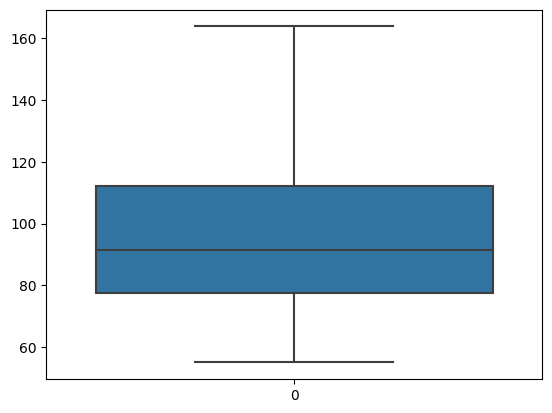

In [ ]:
cap_outliers("avg_glucose_level")

> There are no outliers left in above figure.

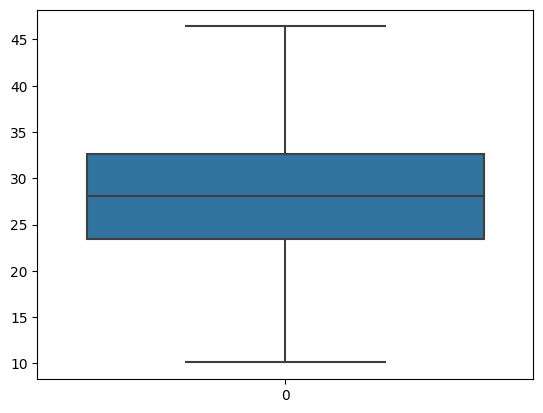

In [ ]:
cap_outliers("bmi")

> There are no outliers left in above figure.

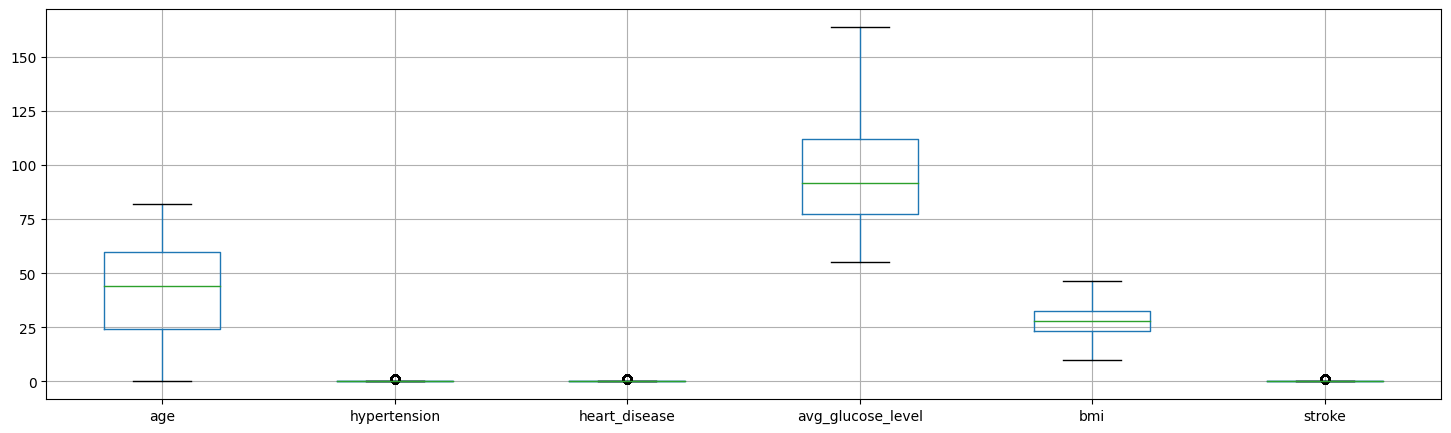

In [ ]:
import matplotlib.pyplot as plt
new_df_cap.iloc[:,1:].boxplot(figsize=(18,5))
plt.subplots_adjust(bottom=0.1)
plt.show()

> Since hypertension, heart disease and stroke are categorical variables, hence there cannot be outliers in a categorical data because all the data values will fall under some category for sure.

# 13. Separating input and target features

> Separate the copy of dataset on which capping was performed.

In [ ]:
x=new_df_cap.drop(["id","stroke"],axis=1)
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_cat,age_cat,glucose_cat
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,Underweight,Children,Normal
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,Obesity,Mid Adults,Low
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,Underweight,Children,Normal
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,Obesity,Elderly,Low
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,Ideal,Teens,High


> X is the input data

In [ ]:
y=new_df_cap["stroke"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

> Y is target label

# 14. Detecting Skewness

In [ ]:
x.skew().sort_values()

age                 -0.102497
bmi                  0.459568
avg_glucose_level    0.921328
hypertension         2.791199
heart_disease        4.254252
dtype: float64

> If the skewness is between -0.5 & 0.5, then the data are nearly symmetrical.
Assuming this range, it can observed that the following features have high skewness
- avg glucose level
- hypertension
- heart disease

> Since hypertension and heart disease are categorical variables we move ahead with avg glucose level which is numerical feature having high skewness.

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

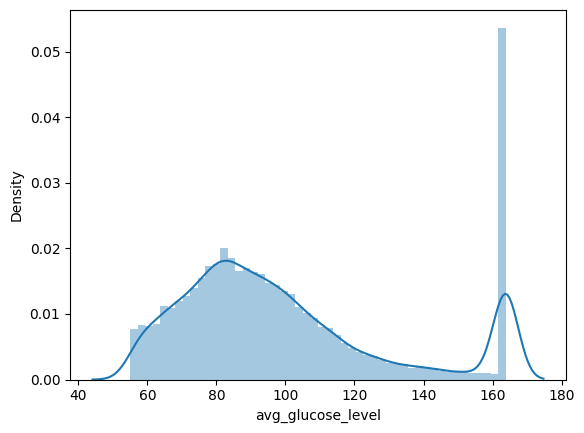

In [ ]:
sns.distplot(x['avg_glucose_level'])

> Distribution of glucose level is positvely skewed.

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x['avg_glucose_level']=qt.fit_transform(x['avg_glucose_level'].values.reshape(-1,1))

> Skewness degrades the model's ability to describe typical cases as it has to deal with rare cases on extreme values.
Hence we use QuantileTransformer which is one of many different techniques that can be used to reduce the skewness of the feature.

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

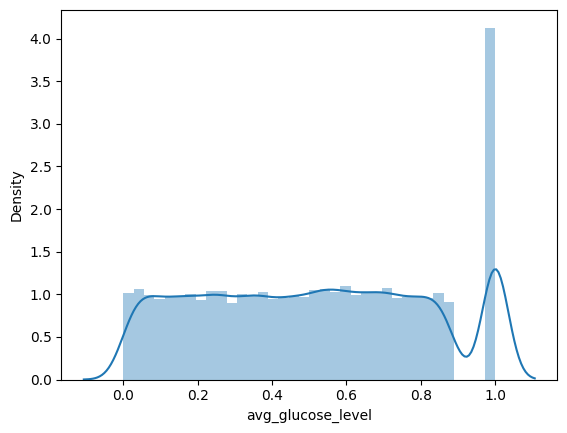

In [ ]:
sns.distplot(x['avg_glucose_level'])

> It can now be observed that glucose level feature has reduced skewness

In [ ]:
x.skew().sort_values()

age                 -0.102497
avg_glucose_level    0.077606
bmi                  0.459568
hypertension         2.791199
heart_disease        4.254252
dtype: float64

> Glucose level is now in range of -0.5 to 0.5

# 15. Encoding Categorical Features

In [ ]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_cat,age_cat,glucose_cat
0,Male,3.0,0,0,No,children,Rural,0.558985,18.0,never smoked,Underweight,Children,Normal
1,Male,58.0,1,0,Yes,Private,Urban,0.445112,39.2,never smoked,Obesity,Mid Adults,Low
2,Female,8.0,0,0,No,Private,Urban,0.739096,17.6,never smoked,Underweight,Children,Normal
3,Female,70.0,0,0,Yes,Private,Rural,0.130363,35.9,formerly smoked,Obesity,Elderly,Low
4,Male,14.0,0,0,No,Never_worked,Rural,0.883827,19.1,never smoked,Ideal,Teens,High


In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
lenc=LabelEncoder()
listenc=["gender","ever_married","work_type","Residence_type","smoking_status","bmi_cat","age_cat","glucose_cat"]
for i in listenc:
    x[i]=lenc.fit_transform(x[i].values.reshape(-1,1))

x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_cat,age_cat,glucose_cat
0,1,3.0,0,0,0,4,0,0.558985,18.0,1,3,1,2
1,1,58.0,1,0,1,2,1,0.445112,39.2,1,1,3,1
2,0,8.0,0,0,0,2,1,0.739096,17.6,1,3,1,2
3,0,70.0,0,0,1,2,0,0.130363,35.9,0,1,2,1
4,1,14.0,0,0,0,1,0,0.883827,19.1,1,0,4,0


> Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.

# 16. Oversampling

In [ ]:
y.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

> It is observed that target feature values are unbalanced

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_new, y_new = sm.fit_resample(x, y)

> - Since the target categorical label are unbalanced we use oversampling technique to balance the label by sampling minority class and simply duplicates sample observation.

> - We avoid performing undersampling since it can cause loss of important data in this case.

In [ ]:
y_new.value_counts()

0    42617
1    42617
Name: stroke, dtype: int64

In [ ]:
y=y_new

# 17. Scaling

> Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled, hence we perform scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


mns=MinMaxScaler()
s=mns.fit_transform(x_new)
x=pd.DataFrame(data=s)
print(x)

        0         1    2    3    4     5    6         7         8    9   \
0      0.5  0.035645  0.0  0.0  0.0  1.00  0.0  0.558985  0.217631  0.5   
1      0.5  0.707031  1.0  0.0  1.0  0.50  1.0  0.445112  0.801653  0.5   
2      0.0  0.096680  0.0  0.0  0.0  0.50  1.0  0.739096  0.206612  0.5   
3      0.0  0.853516  0.0  0.0  1.0  0.50  0.0  0.130363  0.710744  0.0   
4      0.5  0.169922  0.0  0.0  0.0  0.25  0.0  0.883827  0.247934  0.5   
...    ...       ...  ...  ...  ...   ...  ...       ...       ...  ...   
85229  0.0  0.973139  0.0  0.0  1.0  0.50  0.0  0.730052  0.212124  0.0   
85230  0.5  0.867877  0.0  0.0  1.0  0.50  1.0  0.306028  0.509781  0.5   
85231  0.0  0.576876  0.0  0.0  1.0  0.50  0.0  0.348844  0.509781  0.5   
85232  0.0  0.969903  0.0  0.0  1.0  0.50  0.0  0.722991  0.479909  0.5   
85233  0.0  0.971159  0.0  0.0  1.0  0.50  1.0  1.000000  0.486331  0.5   

             10    11        12  
0      1.000000  0.25  0.666667  
1      0.333333  0.75  0.333333

# 18. Training and Testing Different Models


# a. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg=LogisticRegression()

> Importing first model for training data.

In [ ]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if  round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i)
        print("training accuracy: ",round(accuracy_score(y_train,pred_train)))
        print("testing accuracy:", round(accuracy_score(y_test,pred_test)))
        print("\n")


At random state 15
training accuracy:  1
testing accuracy: 1


At random state 20
training accuracy:  1
testing accuracy: 1


At random state 30
training accuracy:  1
testing accuracy: 1


At random state 43
training accuracy:  1
testing accuracy: 1


At random state 61
training accuracy:  1
testing accuracy: 1


At random state 79
training accuracy:  1
testing accuracy: 1




In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=90)

In [ ]:
lg.fit(x_train,y_train)
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)

In [ ]:
print("Train Accuracy:",accuracy_score(y_train,pred_train))

Train Accuracy: 0.8083212342528634


In [ ]:
print("Train Accuracy:",accuracy_score(y_train,pred_train))

Train Accuracy: 0.8083212342528634


In [ ]:
print("Test Accuracy:",accuracy_score(y_test,pred_test))

Test Accuracy: 0.8055376312547662


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      8626
           1       0.79      0.83      0.81      8421

    accuracy                           0.81     17047
   macro avg       0.81      0.81      0.81     17047
weighted avg       0.81      0.81      0.81     17047



In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,pred_test)
print("Confusion Matrix\n",cm1)

Confusion Matrix
 [[6718 1908]
 [1407 7014]]


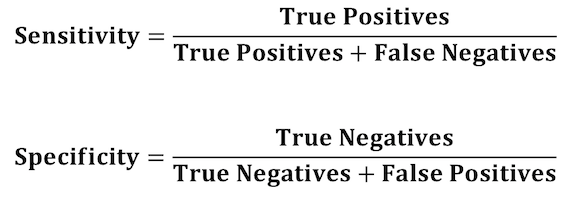

In [ ]:
from imblearn.metrics import specificity_score
a=specificity_score(y_test,pred_test)
print("Specificity :",a*100)

Specificity : 77.88082541154648


In [ ]:
specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1*100)

Specificity :  77.88082541154648


> Using specificity formula we get same result as specificity_score method

In [ ]:
from imblearn.metrics import sensitivity_score
b=sensitivity_score(y_test,pred_test)
print("Sensitivity :",b*100)

Sensitivity : 83.29177057356608


In [ ]:
sensitivity1 = cm1[1,1]/(cm1[1,1]+cm1[1,0])
print('Sensitivity : ', sensitivity1*100)

Sensitivity :  83.29177057356608


> Using sensitivity formula we get same result as sensitivity_score method

>  
- Training Accuracy : 80.83%
- Testing Accuracy : 80.55%
- Specificity : 77.88%
- Sensitivity : 83.29%

**Cross validation**

> Cross validation is a technique used in ML to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set.

In [ ]:
pred_lg=lg.predict(x_test)
lss=accuracy_score(y_test,pred_lg)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lg,x,y,cv=j)
    print(cv_score)
    cv_mean=cv_score.mean()
    print("At cv:",j)
    print("cv score is ",cv_mean*100)
    print("accuracy is", lss*100)
    print("\n")

[0.80709576 0.8083394 ]
At cv: 2
cv score is  80.771757749255
accuracy is 80.55376312547662


[0.80476559 0.81053113 0.80789131]
At cv: 3
cv score is  80.77293446717584
accuracy is 80.55376312547662


[0.80435497 0.80914168 0.80936737 0.80781866]
At cv: 4
cv score is  80.76706695062346
accuracy is 80.55376312547662


[0.80137268 0.80888133 0.81163841 0.80571362 0.81033674]
At cv: 5
cv score is  80.75885532555394
accuracy is 80.55376312547662


[0.80008447 0.80888357 0.81043221 0.81092496 0.80598381 0.8093629 ]
At cv: 6
cv score is  80.76119872672217
accuracy is 80.55376312547662


[0.79732282 0.81046235 0.81036465 0.80978975 0.80863995 0.80658673
 0.80929698]
At cv: 7
cv score is  80.74947462787597
accuracy is 80.55376312547662


[0.79774754 0.80947912 0.80617608 0.81227708 0.81021213 0.80927351
 0.8083349  0.80786559]
At cv: 8
cv score is  80.76707430700422
accuracy is 80.55376312547662


[0.79769824 0.80656742 0.80857354 0.81258579 0.80760296 0.8124604
 0.80665259 0.80865892 0.808342

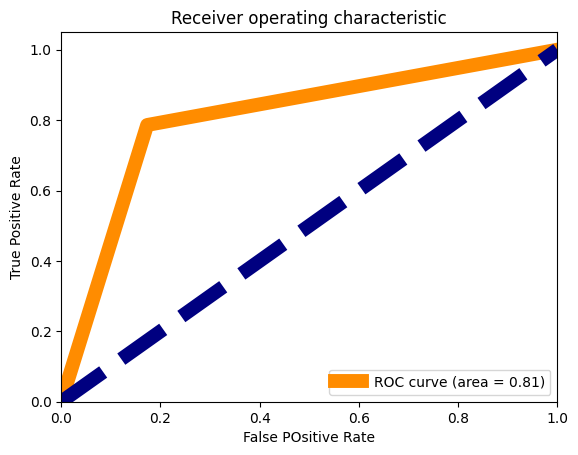

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()

> An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds

# b. Model Selection Method

> Instead of repeating code we create method that can be called each time we need to train and test any new model.

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_val_score
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(accuracy_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(accuracy_score(y_test,model_pred_test)*100,2))
    cv_score=cross_val_score(algorithm_instance,x,y,cv=5)
    cv_mean=cv_score.mean()
    print("cv score is ",round(cv_mean*100,2))
    specificity1 = specificity_score(y_test,model_pred_test)
    print('\nSpecificity : ', round(specificity1*100,2))
    sensitivity1 = sensitivity_score(y_test,model_pred_test)
    print('\nSensitivty : ', round(sensitivity1*100,2))
    print("\nClassification report for training data\n",classification_report(y_train,model_pred_train))
    print("Classification report for test data\n",classification_report(y_test,model_pred_test))
    cm1=confusion_matrix(y_test,model_pred_test)
    print("Confusion Matrix\n",cm1)
    print("\n")

    fpr, tpr, thresholds = roc_curve(model_pred_test,y_test)
    roc_auc= auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()


#c. KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


parameter={'n_neighbors':range(0,100,50),
          'weights':["uniform", "distance"],
           'algorithm':["auto", "ball_tree", "kd_tree", "brute"],
           'leaf_size':range(0,100,50),
           'n_jobs':range(0,100,50)}


k=KNeighborsClassifier()
clf=GridSearchCV(k,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 50, 'n_jobs': 50, 'n_neighbors': 50, 'weights': 'distance'}


Accuracy of training model : 99.99
Accuracy of test data : 88.72
cv score is  88.99

Specificity :  79.68

Sensitivty :  97.98

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33991
           1       1.00      1.00      1.00     34196

    accuracy                           1.00     68187
   macro avg       1.00      1.00      1.00     68187
weighted avg       1.00      1.00      1.00     68187

Classification report for test data
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      8626
           1       0.82      0.98      0.90      8421

    accuracy                           0.89     17047
   macro avg       0.90      0.89      0.89     17047
weighted avg       0.90      0.89      0.89     17047

Confusion Matrix
 [[6873 1753]
 [ 170 8251]]




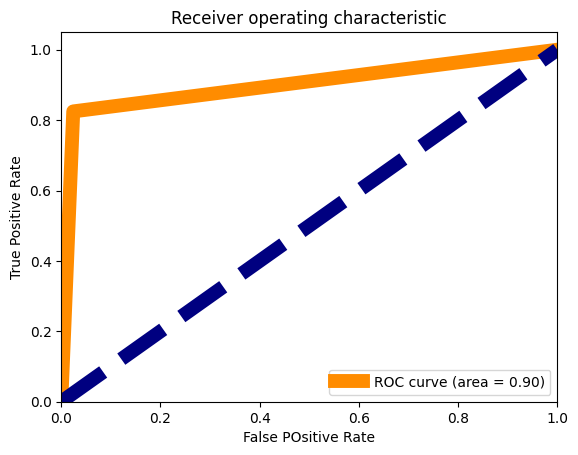

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=50, weights= 'distance',algorithm='auto', leaf_size=50,n_jobs=50)
model_selection(k,x_train,y_train,x_test,y_test)

# d. SVC Model

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameter={'degree':range(3,6,3),
           'probability':[True,False]}


s=svm.SVC()
clf=GridSearchCV(s,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'degree': 3, 'probability': True}


Accuracy of training model : 86.45
Accuracy of test data : 86.07
cv score is  86.18

Specificity :  81.76

Sensitivty :  90.49

Classification report for training data
               precision    recall  f1-score   support

           0       0.90      0.82      0.86     33991
           1       0.84      0.91      0.87     34196

    accuracy                           0.86     68187
   macro avg       0.87      0.86      0.86     68187
weighted avg       0.87      0.86      0.86     68187

Classification report for test data
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      8626
           1       0.83      0.90      0.87      8421

    accuracy                           0.86     17047
   macro avg       0.86      0.86      0.86     17047
weighted avg       0.86      0.86      0.86     17047

Confusion Matrix
 [[7053 1573]
 [ 801 7620]]




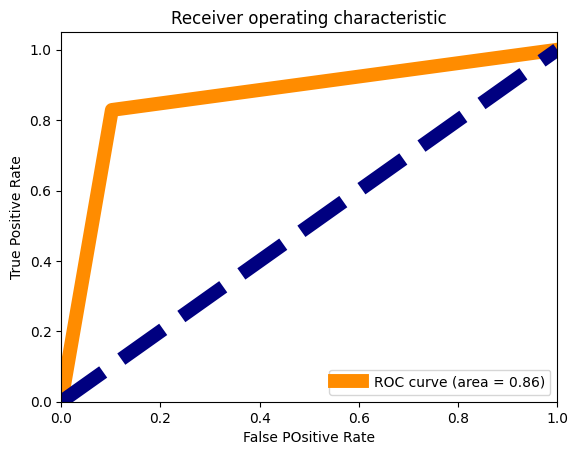

In [ ]:
from sklearn import svm
s=svm.SVC(degree=3, probability=True)
from sklearn.metrics import classification_report
model_selection(s,x_train,y_train,x_test,y_test)

# e. DecisionTressClassifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameter={'splitter':["best", "random"],
           'criterion':["gini", "entropy", "log_loss"],
           'max_depth':range(0,100,50),
           'max_features':["auto", "sqrt", "log2"]}


dtc = DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)



{'criterion': 'log_loss', 'max_depth': 50, 'max_features': 'log2', 'splitter': 'best'}


Accuracy of training model : 99.99
Accuracy of test data : 95.27
cv score is  95.66

Specificity :  94.37

Sensitivty :  96.19

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33991
           1       1.00      1.00      1.00     34196

    accuracy                           1.00     68187
   macro avg       1.00      1.00      1.00     68187
weighted avg       1.00      1.00      1.00     68187

Classification report for test data
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      8626
           1       0.94      0.96      0.95      8421

    accuracy                           0.95     17047
   macro avg       0.95      0.95      0.95     17047
weighted avg       0.95      0.95      0.95     17047

Confusion Matrix
 [[8140  486]
 [ 321 8100]]




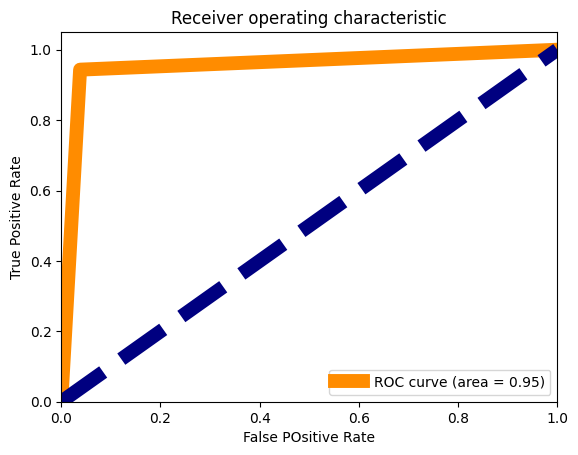

In [ ]:
dtc = DecisionTreeClassifier(criterion= 'log_loss', max_depth=50, max_features='log2', splitter='best')
model_selection(dtc,x_train,y_train,x_test,y_test)


#Ensemble Method

# f. RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features' : [None,"sqrt","log2"],
           'class_weight':['balanced',' balanced_subsample'],
           'n_estimators':range(0,100,50)}

rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}


Accuracy of training model : 99.99
Accuracy of test data : 98.01
cv score is  97.9

Specificity :  97.54

Sensitivty :  98.48

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33991
           1       1.00      1.00      1.00     34196

    accuracy                           1.00     68187
   macro avg       1.00      1.00      1.00     68187
weighted avg       1.00      1.00      1.00     68187

Classification report for test data
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      8626
           1       0.98      0.98      0.98      8421

    accuracy                           0.98     17047
   macro avg       0.98      0.98      0.98     17047
weighted avg       0.98      0.98      0.98     17047

Confusion Matrix
 [[8414  212]
 [ 128 8293]]




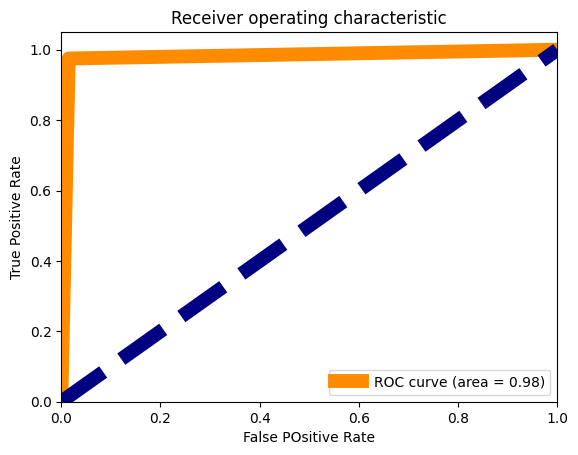

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50, class_weight= 'balanced',criterion='entropy', max_features='sqrt')
model_selection(rf,x_train,y_train,x_test,y_test)

# g. GradientBoostingClassifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,50)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'exponential', 'max_features': 'auto', 'n_estimators': 50}


Accuracy of training model : 84.85
Accuracy of test data : 84.99
cv score is  84.62

Specificity :  81.18

Sensitivty :  88.88

Classification report for training data
               precision    recall  f1-score   support

           0       0.88      0.81      0.84     33991
           1       0.82      0.89      0.85     34196

    accuracy                           0.85     68187
   macro avg       0.85      0.85      0.85     68187
weighted avg       0.85      0.85      0.85     68187

Classification report for test data
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      8626
           1       0.82      0.89      0.85      8421

    accuracy                           0.85     17047
   macro avg       0.85      0.85      0.85     17047
weighted avg       0.85      0.85      0.85     17047

Confusion Matrix
 [[7003 1623]
 [ 936 7485]]




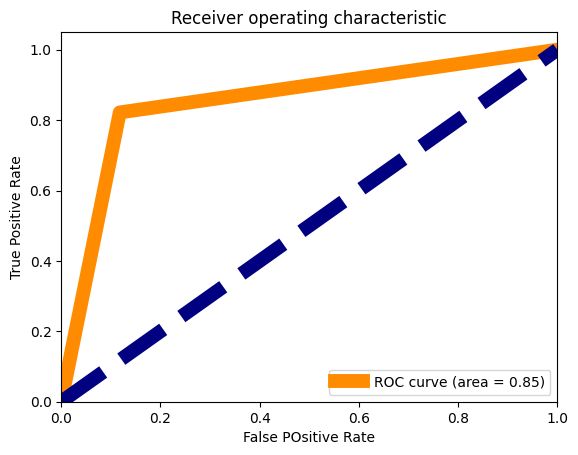

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rf3=GradientBoostingClassifier(criterion='friedman_mse', loss='exponential', max_features= 'auto', n_estimators= 50)
model_selection(rf3,x_train,y_train,x_test,y_test)

# 19. Saving Best Model

In [ ]:
import pickle
filename='rfz.pk1'
pickle.dump(rf,open(filename,'wb'))

> Randforest Classifier is saved since it give highest accuracy, specificity and ROC score.

# 20. Loading Model

In [ ]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Accuracy: ",round(result*100,2))

Model Accuracy:  98.01


#21. Summary

>1) What are the main factors that contribute to stroke occurrence in the dataset?

>**Some of the major factors that contribute to stroke occurence are bmi_level, age, smoking_status, job_type, marital_status.**

>2) Can we effectively identify individuals at risk of experiencing cerebral strokes based on their attributes?

> **People with**
- **higher bmi (Overweight and obese)**
- **very low glucose level**
- **having smoking habits or previous smoking history**
- **belong to eldery category**

>3) How well does the model perform in detecting stroke occurrence while considering the class imbalance?

> **It is observed that Randomforest classifier model gives best result among all the models tested, with high accuracy of 98.01%. Hence we can apply**

>4) How can healthcare providers use the model's predictions to improve patient care and reduce the risk of strokes?

> **We can deploy the model and use it to predict if the patient has possibility of suffering from stroke in future based of their daily habits and current health condition. Hence it is possible to perform timely diagnosis (with 98.01% accuracy) and help cure patient before they suffer a stroke.**